In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.models import load_model
import tensorflow.keras.utils as ku 
import numpy as np
import pandas as pd
import re

In [2]:
tf.random.set_seed(42)

Set Random to 42

In [3]:
data = pd.read_csv('Arabic_poetry_dataset.csv')

In [4]:
poems_count = 200
generated_poet = data[data['poet_name'] == 'جبران خليل جبران'].sample(frac=1)[:poems_count]

In [5]:
poems = np.array(generated_poet['poem_text'].values.tolist())

In [6]:
clean_poets = []
for i in poems:
    clean_poets.append(re.sub('([@A-Za-z0-9_ـــــــــــــ]+)|[^\w\s]|#|http\S+', ' ', i))

In [7]:
tokenizer = Tokenizer()
corpus = clean_poets

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1
print(total_words)

5298


In [8]:
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

In [9]:
pad_seq = [len(x) for x in input_sequences]
max_sequence_len = max(pad_seq)
print(max_sequence_len)

496


In [10]:
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [11]:
print(tokenizer.word_index)

{'في': 1, 'من': 2, 'ما': 3, 'يا': 4, 'على': 5, 'عن': 6, 'به': 7, 'إلى': 8, 'لا': 9, 'إن': 10, 'وما': 11, 'أن': 12, 'لم': 13, 'إلا': 14, 'كل': 15, 'بها': 16, 'أو': 17, 'له': 18, 'تلك': 19, 'الذي': 20, 'ولم': 21, 'قد': 22, 'إذا': 23, 'آل': 24, 'فيها': 25, 'ولا': 26, 'فيه': 27, 'الله': 28, 'بين': 29, 'ذاك': 30, 'ومن': 31, 'منه': 32, 'هي': 33, 'مصر': 34, 'لها': 35, 'وقد': 36, 'حتى': 37, 'فما': 38, 'آان': 39, 'بعد': 40, 'كان': 41, 'ألا': 42, 'هل': 43, 'الحياة': 44, 'لو': 45, 'عليه': 46, 'وفي': 47, 'بما': 48, 'يوم': 49, 'غير': 50, 'خير': 51, 'إليه': 52, 'وإن': 53, 'هذا': 54, 'التي': 55, 'أنت': 56, 'هذي': 57, 'ليس': 58, 'سعد': 59, 'هو': 60, 'الناس': 61, 'إذ': 62, 'لكن': 63, 'الزمان': 64, 'المنى': 65, 'وهو': 66, 'الدهر': 67, 'لنا': 68, 'سوى': 69, 'لله': 70, 'حسن': 71, 'أما': 72, 'النهى': 73, 'حين': 74, 'فتى': 75, 'عين': 76, 'الهوى': 77, 'ليلى': 78, 'عنها': 79, 'وهي': 80, 'عليها': 81, 'النفس': 82, 'لي': 83, 'منها': 84, 'المحيا': 85, 'أسرة': 86, 'فلم': 87, 'فإن': 88, 'بعض': 89, 'بهم': 90, 'اليوم

In [12]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.2))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
history = model.fit(predictors, label, epochs=100, verbose=1, batch_size=128, shuffle=True)

Epoch 1/100
65/65 [==============================] - 18s 160ms/step - loss: 8.4858 - accuracy: 0.0277
Epoch 2/100
65/65 [==============================] - 10s 158ms/step - loss: 8.1038 - accuracy: 0.0320
Epoch 3/100
65/65 [==============================] - 10s 157ms/step - loss: 8.0100 - accuracy: 0.0320
Epoch 4/100
65/65 [==============================] - 10s 157ms/step - loss: 7.9164 - accuracy: 0.0320
Epoch 5/100
65/65 [==============================] - 10s 158ms/step - loss: 7.7698 - accuracy: 0.0319
Epoch 6/100
65/65 [==============================] - 10s 157ms/step - loss: 7.6078 - accuracy: 0.0327
Epoch 7/100
65/65 [==============================] - 10s 157ms/step - loss: 7.4320 - accuracy: 0.0319
Epoch 8/100
65/65 [==============================] - 10s 157ms/step - loss: 7.2515 - accuracy: 0.0342
Epoch 9/100
65/65 [==============================] - 10s 157ms/step - loss: 7.0792 - accuracy: 0.0349
Epoch 10/100
65/65 [==============================] - 10s 157ms/step - loss: 6.914

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 495, 100)          529800    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              84480     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 5298)              683442    
                                                                 
Total params: 1,297,722
Trainable params: 1,297,722
Non-trainable params: 0
_________________________________________________________________


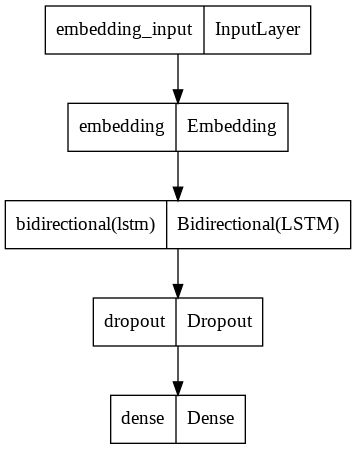

In [15]:
from tensorflow.keras.utils import plot_model

plot_model(model)

In [17]:
model.save('jebran_poem_train.h5')